**Principles of Data Mining and Machine Learning**

(MOD 007892, Element 010, Component 1)

Component 1, Part 1 – Coursework Project

**Task**

Analyze the ECG to check for irregularities in the heart's rhythm, identify any damage to the heart muscle, and diagnose various heart conditions.

#1.Loading Required Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
sb.set_style("whitegrid")
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler,LabelEncoder,LabelBinarizer
from sklearn.metrics import precision_score,recall_score,f1_score,confusion_matrix
import warnings
warnings.filterwarnings(action = "ignore")
from sklearn.utils import resample # For resampling

#MLmodels

# Convolution Neural network
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical

#2.Loading Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train = pd.read_csv("/content/drive/MyDrive/CLIENT01_AKSHAY/ECG_ML__Akshay/mitbih_train.csv",header=None)
test = pd.read_csv("/content/drive/MyDrive/CLIENT01_AKSHAY/ECG_ML__Akshay/mitbih_test.csv",header=None)

# 3.Data Understanding

**ECG**

An electrocardiogram, or ECG, is a test that helps doctors understand the electrical activity of your heart. It's a way of recording the electrical signals that make your heart beat.

Here's how it works:

Heart's Electrical System: Your heart has its own electrical system that controls the rhythm of your heartbeat. This system sends signals to the heart muscle, telling it when to contract and pump blood.

Electrodes: During an ECG, small, sticky patches called electrodes are placed on your skin, usually on your chest, arms, and legs. These electrodes detect the electrical signals produced by your heart.

Recording: The electrodes are connected to a machine that records these signals on paper or a computer screen. The resulting graph is the electrocardiogram.

Graph Patterns: The graph shows a series of waves, each representing a different phase of the heart's electrical cycle. The main waves are called the P wave, QRS complex, and T wave.

P wave: Represents the electrical activity as the heart's upper chambers (atria) contract.

QRS complex: Indicates the electrical signals as the heart's lower chambers (ventricles) contract.

T wave: Shows the recovery or relaxation of the ventricles.

Analysis: Doctors can analyze the ECG to check for irregularities in the heart's rhythm, identify any damage to the heart muscle, and diagnose various heart conditions.



**Dataset details**

Database Name: MIT-BIH Arrhythmia Database https://www.kaggle.com/datasets/shayanfazeli/heartbeat/data?select=mitbih_train.csv

Contents: 48 half-hour excerpts of two-channel ambulatory ECG recordings from 47 subjects.

Collection Period: 1975-1979

Recording Source: 23 recordings randomly chosen from 4000 24-hour ambulatory ECG recordings (60% inpatients, 40% outpatients) at Beth Israel Hospital; 25 recordings selected to include less common but clinically significant arrhythmias.

Digitization: Recorded at 360 samples per second per channel with 11-bit resolution over a 10 mV range.

Annotation: Two or more cardiologists independently annotated each record, resolving disagreements to obtain computer-readable reference annotations for each beat (approximately 110,000 annotations in total).

Availability: Half of the database has been freely available since September 1999, and the remaining files were posted in February 2005.



**Dataset overview**

Number of Samples(train and test): 109446

Number of Categories: 5

Sampling Frequency: 125Hz

Data Source: Physionet's MIT-BIH Arrhythmia Dataset

Classes: ['N': 0, 'S': 1, 'V': 2, 'F': 3, 'Q': 4]

# 4.Exploratory Data Analysis

In [ ]:
#preview of head data
train.head(3)

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#preview of tail data
train.tail(3)

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
87551,0.906122,0.624490,0.595918,0.575510,0.530612,0.481633,0.444898,0.387755,0.322449,0.191837,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
87552,0.858228,0.645570,0.845570,0.248101,0.167089,0.131646,0.121519,0.121519,0.118987,0.103797,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
87553,0.901506,0.845886,0.800695,0.748552,0.687138,0.599073,0.512167,0.427578,0.395133,0.402086,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0


Data shows the heart rate in the form of floating point number

In [ ]:
#Size of data
print(train.shape)
print(test.shape)

(87554, 188)
(21892, 188)


In [ ]:
#information of data
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87554 entries, 0 to 87553
Columns: 188 entries, 0 to 187
dtypes: float64(188)
memory usage: 125.6 MB


In [ ]:
# Setting Dictionary to define the type of Heartbeat
classes_outcome = {0. : 'Normal Beat',1. : 'Supraventricular premature beat',2. : 'Premature ventricular contraction',
               3. : 'Fusion of ventricular and normal beat',
               4. : 'Unclassifiable beat'}

In [ ]:
# Last attribute shows the classes
target = train[187].value_counts()
train[187].unique()

array([0., 1., 2., 3., 4.])

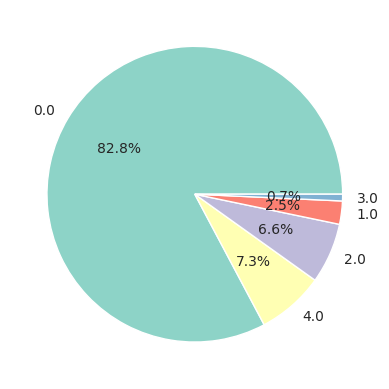

In [ ]:
# Create a pie chart for different classes count
plt.pie(target.values, labels=target.index, colors=sb.color_palette('Set3'), autopct='%1.1f%%')  # 'Set3' is an example palette name

# Show the pie chart
plt.show()

As we see above our data contains 82.8% of zero classes which makes our data imbalance for training.

There are many ways to handle imbalance data. We simply choose resampling and make our data balanced.

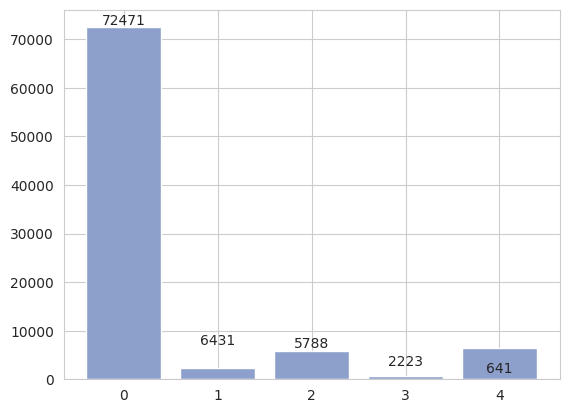

In [ ]:
#Checking actual count of values
# Create a bar chart
plt.bar(target.index, target.values, color=sb.color_palette('Set2')[2])  # 'Set2' is an example palette name and [3] selects a specific color

# Display value counts on top of each bar
for i, count in enumerate(target.values):
    plt.text(i, count + 0.2, str(count), ha='center', va='bottom')

# Show the bar chart
plt.show()

In [ ]:
# Extracting subsets based on conditions for resampling classes
class0 = train[train[187] == 0].sample(n=20000, random_state=42)
class1 = resample(train[train[187] == 1], replace=True, n_samples=20000, random_state=0)
class2 = resample(train[train[187] == 2], replace=True, n_samples=20000, random_state=0)
class3 = resample(train[train[187] == 3], replace=True, n_samples=20000, random_state=0)
class4 = resample(train[train[187] == 4], replace=True, n_samples=20000, random_state=0)

# Concatenating the resampled subsets
train_resampled = pd.concat([class0, class1, class2, class3, class4])


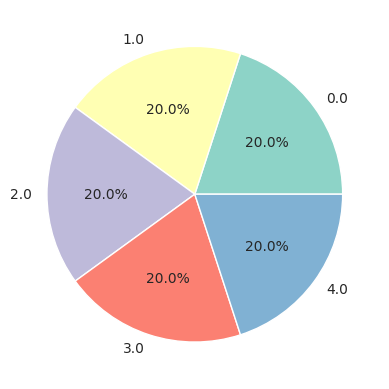

In [ ]:
# Again checking different classes count
target_resampled = train_resampled[187].value_counts()
plt.pie(target_resampled.values, labels=target_resampled.index, colors=sb.color_palette('Set3'), autopct='%1.1f%%')  # 'Set3' is an example palette name

# Show the pie chart
plt.show()

Now all classes have a equal distribution

Now checking for testing data

In [ ]:
#preview of head data
test.head(3)

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,1.000000,0.758264,0.111570,0.000000,0.080579,0.078512,0.066116,0.049587,0.047521,0.035124,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.908425,0.783883,0.531136,0.362637,0.366300,0.344322,0.333333,0.307692,0.296703,0.300366,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.730088,0.212389,0.000000,0.119469,0.101770,0.101770,0.110619,0.123894,0.115044,0.132743,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#preview of tail data
test.tail(3)

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
21889,1.000000,0.967359,0.620178,0.347181,0.139466,0.089021,0.103858,0.100890,0.106825,0.100890,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
21890,0.984127,0.567460,0.607143,0.583333,0.607143,0.575397,0.575397,0.488095,0.392857,0.238095,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
21891,0.973970,0.913232,0.865510,0.823210,0.746204,0.642082,0.547722,0.426247,0.325380,0.279826,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0


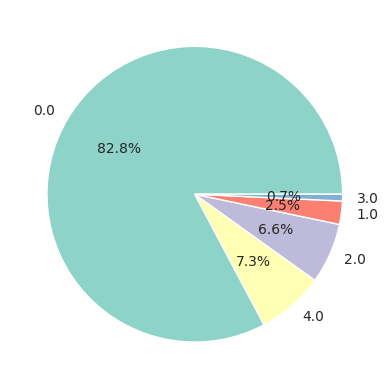

In [ ]:
# Again checking different classes count for testing data
target_test= test[187].value_counts()
plt.pie(target_test.values, labels=target_test.index, colors=sb.color_palette('Set3'), autopct='%1.1f%%')  # 'Set3' is an example palette name

# Show the pie chart
plt.show()

In [ ]:
# Extracting subsets based on conditions for resampling classes for testing data
class0 = test[test[187] == 0].sample(n=2000, random_state=42)
class1 = resample(test[test[187] == 1], replace=True, n_samples=2000, random_state=0)
class2 = resample(test[test[187] == 2], replace=True, n_samples=2000, random_state=0)
class3 = resample(test[test[187] == 3], replace=True, n_samples=2000, random_state=0)
class4 = resample(test[test[187] == 4], replace=True, n_samples=2000, random_state=0)

# Concatenating the resampled subsets
test_resampled = pd.concat([class0, class1, class2, class3, class4])

Finding correlation

In [ ]:
# Extracting the ECG data columns
ecg_data = train_resampled.iloc[:, :187]

# Calculating correlations with the target column (column 187, 0-based index)
correlations = ecg_data.corrwith(train_resampled[187])

# Finding the column with the highest correlation
highest_corr_column = correlations.idxmax()
highest_corr_value = correlations.max()

print(f"The column with the highest correlation is {highest_corr_column} with a correlation value of {highest_corr_value}")

The column with the highest correlation is 3 with a correlation value of 0.5504690255503034



Column 3 demonstrates the highest Pearson correlation, yet in signal data, correlation may lack effectiveness. However, it highlights  most crucial  moment in heart signal measurements, with column 3 denoting this pivotal point in the dataset.


Text(0, 0.5, 'time in seconds')

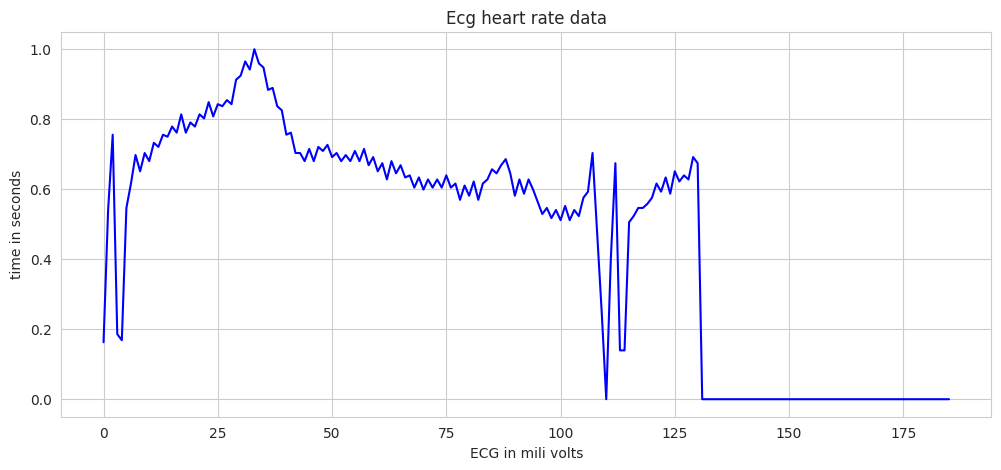

In [ ]:
#Visualize ECG data
plt.figure(figsize = [12,5])
plt.plot(train_resampled.iloc[0,:186], color = 'blue')
plt.title('Ecg heart rate data')
plt.xlabel('ECG in mili volts')
plt.ylabel('time in seconds')

# 5.Preprocessing

In [ ]:
#Data Description
train_resampled.describe()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.840932,0.736528,0.480757,0.312775,0.271616,0.263480,0.247730,0.234907,0.222073,0.203626,...,0.013934,0.013488,0.012929,0.012202,0.011737,0.011386,0.011007,0.010611,0.010399,2.000000
std,0.280244,0.262784,0.251674,0.251809,0.225701,0.207600,0.202147,0.189896,0.173331,0.164520,...,0.073328,0.073200,0.071067,0.068560,0.067199,0.065921,0.063869,0.062265,0.061206,1.414221
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.827023,0.617440,0.283001,0.101185,0.104816,0.116981,0.101348,0.090226,0.086313,0.084337,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.972452,0.831169,0.486009,0.268908,0.193348,0.181912,0.162385,0.173025,0.184193,0.161430,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,1.000000,0.924282,0.655932,0.470175,0.388715,0.383244,0.375000,0.350000,0.306073,0.272136,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000


We don't need to normalize are data

In [ ]:
#Data information
train_resampled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 10153 to 83367
Columns: 188 entries, 0 to 187
dtypes: float64(188)
memory usage: 144.2 MB


In [ ]:
#Missing value
train_resampled.isna().sum()

0      0
1      0
2      0
3      0
4      0
      ..
183    0
184    0
185    0
186    0
187    0
Length: 188, dtype: int64

In [ ]:
#Splitting training data
X_train = train_resampled.iloc[: , :-1]
y_train = train_resampled.iloc[: ,-1]

#Splitting testing data
X_test = test_resampled.iloc[: , :-1]
y_test = test_resampled.iloc[: ,-1]

#6.Machine Learning Models

------------------**Supervised Learning Algorithms:**------------------

**Support Vector Machines (SVM):**

Usage: Classification of ECG signals into different arrhythmias or abnormalities.

Performance: SVMs are effective for small to medium-sized datasets but might struggle with larger datasets or high-dimensional feature spaces.


**Random Forest:**

Usage: Classification tasks, especially when dealing with a variety of ECG features.

Performance: Robust for handling high-dimensional data and often provides good accuracy. May suffer from overfitting with highly complex datasets.


**Convolutional Neural Networks (CNN):**

Usage: Analyzing ECG signals as 2D images or 1D time series data.

Performance: Effective in capturing local dependencies within the ECG signal. CNNs excel at feature extraction from sequential data like ECG.

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
#Function for calculating metrics
def evaluate_classification(y_true, y_pred):
    # Calculate metrics
    accuracy = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred, average='weighted')
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')

    # Generate classification report and confusion matrix
    class_report = classification_report(y_true, y_pred)
    conf_matrix = confusion_matrix(y_true, y_pred)

    # Display metrics
    print(f"Accuracy: {accuracy:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print("Classification Report:")
    print(class_report)
    print("Confusion Matrix:")
    print(conf_matrix)

    metrics_dict = None

    return metrics_dict

In [ ]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# SVM
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_predictions)

# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)

In [ ]:
#Result using SVM model
evaluate_classification(y_test, svm_predictions)

Accuracy: 0.7942
F1 Score: 0.7959
Precision: 0.8095
Recall: 0.7942
Classification Report:
              precision    recall  f1-score   support

         0.0       0.60      0.74      0.67      2000
         1.0       0.90      0.64      0.75      2000
         2.0       0.76      0.79      0.77      2000
         3.0       0.83      0.87      0.85      2000
         4.0       0.95      0.93      0.94      2000

    accuracy                           0.79     10000
   macro avg       0.81      0.79      0.80     10000
weighted avg       0.81      0.79      0.80     10000

Confusion Matrix:
[[1484   89  236  146   45]
 [ 536 1278  106   71    9]
 [ 208   47 1578  123   44]
 [ 149    0  102 1749    0]
 [  77    7   53   10 1853]]


In [ ]:
#Result using Random Forest
evaluate_classification(y_test, rf_predictions)

Accuracy: 0.8681
F1 Score: 0.8699
Precision: 0.9021
Recall: 0.8681
Classification Report:
              precision    recall  f1-score   support

         0.0       0.66      0.99      0.79      2000
         1.0       0.99      0.73      0.84      2000
         2.0       0.88      0.94      0.91      2000
         3.0       0.98      0.71      0.82      2000
         4.0       0.99      0.97      0.98      2000

    accuracy                           0.87     10000
   macro avg       0.90      0.87      0.87     10000
weighted avg       0.90      0.87      0.87     10000

Confusion Matrix:
[[1979    9    8    2    2]
 [ 524 1464    3    0    9]
 [  87    1 1882   20   10]
 [ 351    0  232 1417    0]
 [  54    1    6    0 1939]]


In [ ]:
# XGBClaasifier
from xgboost import XGBClassifier
xgb_model = XGBClassifier(objective='multi:softmax', num_class=5)
xgb_model.fit(X_train, y_train)
xgb_predictions = xgb_model.predict(X_test)

In [ ]:
#Result using XGBClassifier
evaluate_classification(y_test, xgb_predictions)

Accuracy: 0.9058
F1 Score: 0.9067
Precision: 0.9214
Recall: 0.9058
Classification Report:
              precision    recall  f1-score   support

         0.0       0.75      0.98      0.85      2000
         1.0       0.98      0.78      0.87      2000
         2.0       0.90      0.96      0.93      2000
         3.0       0.99      0.83      0.90      2000
         4.0       0.99      0.98      0.99      2000

    accuracy                           0.91     10000
   macro avg       0.92      0.91      0.91     10000
weighted avg       0.92      0.91      0.91     10000

Confusion Matrix:
[[1959   21   13    5    2]
 [ 399 1564   25    0   12]
 [  56    7 1911   16   10]
 [ 178    0  163 1659    0]
 [  27    1    7    0 1965]]


In [ ]:
# GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)
gb_predictions = gb_model.predict(X_test)

In [ ]:
#Result using GradientBoostingClassifier
evaluate_classification(y_test, gb_predictions)

Accuracy: 0.8797
F1 Score: 0.8801
Precision: 0.8856
Recall: 0.8797
Classification Report:
              precision    recall  f1-score   support

         0.0       0.75      0.87      0.80      2000
         1.0       0.93      0.76      0.84      2000
         2.0       0.88      0.91      0.90      2000
         3.0       0.91      0.88      0.90      2000
         4.0       0.96      0.97      0.97      2000

    accuracy                           0.88     10000
   macro avg       0.89      0.88      0.88     10000
weighted avg       0.89      0.88      0.88     10000

Confusion Matrix:
[[1732   94   69   82   23]
 [ 377 1529   35   32   27]
 [  75   13 1829   55   28]
 [ 101   12  120 1767    0]
 [  38    4   14    4 1940]]


In [ ]:
# # # Reshape the data for CNN (assuming X_train and X_test are your ECG data)
# X_train_cnn = X_train.reshape((X_train.shape[0], 187, 1))
# X_test_cnn = X_test.reshape((X_test.shape[0], 187, 1))

# One-hot encode the labels
y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)
num_classes = 5

# Build the CNN model
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=5, activation='relu', input_shape=(187, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=64, kernel_size=5, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))  # num_classes is the number of output classes

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train_encoded, epochs=10, batch_size=32, validation_data=(X_test, y_test_encoded))

#Information in brief
#Conv1D :layers apply convolutional operations on the ECG signal.
#MaxPooling1D :layers perform downsampling to reduce the spatial dimensions.
#Flatten layer :prepares the data for the fully connected layers.
#Dense layers :perform the classification task.
#Dropout layer :helps prevent overfitting by randomly dropping connections during training.
#to_categorical :converts the labels to one-hot encoded format.

Epoch 1/10
3125/3125 [==============================] - 76s 24ms/step - loss: 0.3660 - accuracy: 0.8665 - val_loss: 0.2753 - val_accuracy: 0.9123
Epoch 2/10
3125/3125 [==============================] - 81s 26ms/step - loss: 0.1738 - accuracy: 0.9377 - val_loss: 0.2737 - val_accuracy: 0.9199
Epoch 3/10
3125/3125 [==============================] - 79s 25ms/step - loss: 0.1219 - accuracy: 0.9556 - val_loss: 0.3226 - val_accuracy: 0.9264
Epoch 4/10
3125/3125 [==============================] - 64s 21ms/step - loss: 0.0969 - accuracy: 0.9654 - val_loss: 0.3742 - val_accuracy: 0.9249
Epoch 5/10
3125/3125 [==============================] - 80s 26ms/step - loss: 0.0806 - accuracy: 0.9711 - val_loss: 0.4051 - val_accuracy: 0.9240
Epoch 6/10
3125/3125 [==============================] - 81s 26ms/step - loss: 0.0668 - accuracy: 0.9763 - val_loss: 0.4585 - val_accuracy: 0.9177
Epoch 7/10
3125/3125 [==============================] - 70s 22ms/step - loss: 0.0598 - accuracy: 0.9790 - val_loss: 0.5915 -

In [ ]:
# Get predictions on test data
cnn_predictions= model.predict(X_test)

# Convert one-hot encoded predictions back to labels
predicted_labels = np.argmax(cnn_predictions, axis=1)

313/313 [==============================] - 2s 5ms/step


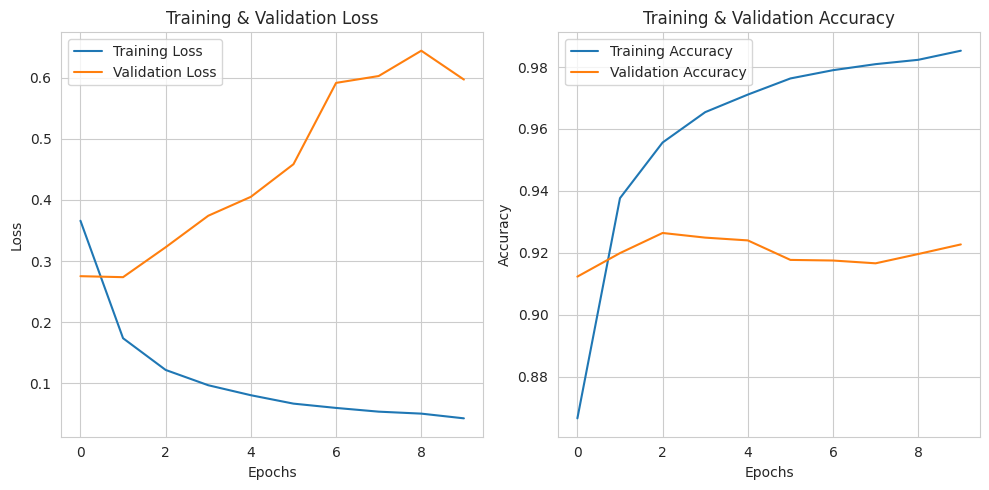

In [ ]:
# Plot training & validation loss values
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

Training loss is decreasing but validation loss is increasing. This is a case of overfitting. We can use batchnormalisation, dropout to overcome the problem of overfitting

# 7.Model Improvement

To enhance model performance, consider the following:

Regularization: Use dropout layers or L1/L2 regularization to prevent overfitting.

Regularization: techniques like dropout layers can help in preventing overfitting in the CNN model.

We can incorporate dropout layers after convolutional layers or dense layers.

Using early stopping during model training can help prevent overfitting by stopping training when the performance on a validation dataset stops improving. Here we are implementing early stopping in Keras:

In [ ]:
# Initialize the Sequential model
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import EarlyStopping


model = Sequential()

# Convolutional layers with MaxPooling
model.add(Conv1D(filters=32, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=(187, 1)))
model.add(Conv1D(filters=32, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides=2))

model.add(Conv1D(filters=32, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(Conv1D(filters=32, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides=2))

model.add(Conv1D(filters=32, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(Conv1D(filters=32, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides=2))

model.add(Conv1D(filters=32, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(Conv1D(filters=32, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides=2))

model.add(Conv1D(filters=32, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(Conv1D(filters=32, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides=2))

# Flatten layer to transition from convolutions to dense layers
model.add(Flatten())

# Dense layers with BatchNormalization and Dropout
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

# Output layer for classification
model.add(Dense(5, activation='softmax'))

# Display model summary
model.summary()


Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_22 (Conv1D)          (None, 187, 32)           192       
                                                                 
 conv1d_23 (Conv1D)          (None, 187, 32)           5152      
                                                                 
 max_pooling1d_17 (MaxPooli  (None, 92, 32)            0         
 ng1D)                                                           
                                                                 
 conv1d_24 (Conv1D)          (None, 92, 32)            5152      
                                                                 
 conv1d_25 (Conv1D)          (None, 92, 32)            5152      
                                                                 
 max_pooling1d_18 (MaxPooli  (None, 44, 32)            0         
 ng1D)                                                

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
es = EarlyStopping(monitor="val_loss", mode="min", verbose=1, patience=7)
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy',
                                            patience=3,
                                            verbose=1,
                                            factor=0.5,
                                            min_lr=0.00001)

In [ ]:
history = model.fit(X_train, y_train_encoded,batch_size=128,
epochs=50,
verbose=1,
validation_data = (X_test, y_test_encoded),
callbacks = [learning_rate_reduction,es])

Epoch 1/50
782/782 [==============================] - 115s 141ms/step - loss: 0.4143 - accuracy: 0.8542 - val_loss: 0.9824 - val_accuracy: 0.7205 - lr: 0.0010
Epoch 2/50
782/782 [==============================] - 123s 158ms/step - loss: 0.2045 - accuracy: 0.9287 - val_loss: 0.3461 - val_accuracy: 0.8820 - lr: 0.0010
Epoch 3/50
782/782 [==============================] - 99s 126ms/step - loss: 0.1473 - accuracy: 0.9495 - val_loss: 0.5984 - val_accuracy: 0.8158 - lr: 0.0010
Epoch 4/50
782/782 [==============================] - 95s 122ms/step - loss: 0.1181 - accuracy: 0.9604 - val_loss: 0.2583 - val_accuracy: 0.9168 - lr: 0.0010
Epoch 5/50
782/782 [==============================] - 99s 126ms/step - loss: 0.0977 - accuracy: 0.9677 - val_loss: 0.4120 - val_accuracy: 0.8977 - lr: 0.0010
Epoch 6/50
782/782 [==============================] - 99s 126ms/step - loss: 0.0826 - accuracy: 0.9729 - val_loss: 0.6474 - val_accuracy: 0.8163 - lr: 0.0010
Epoch 7/50
782/782 [==============================

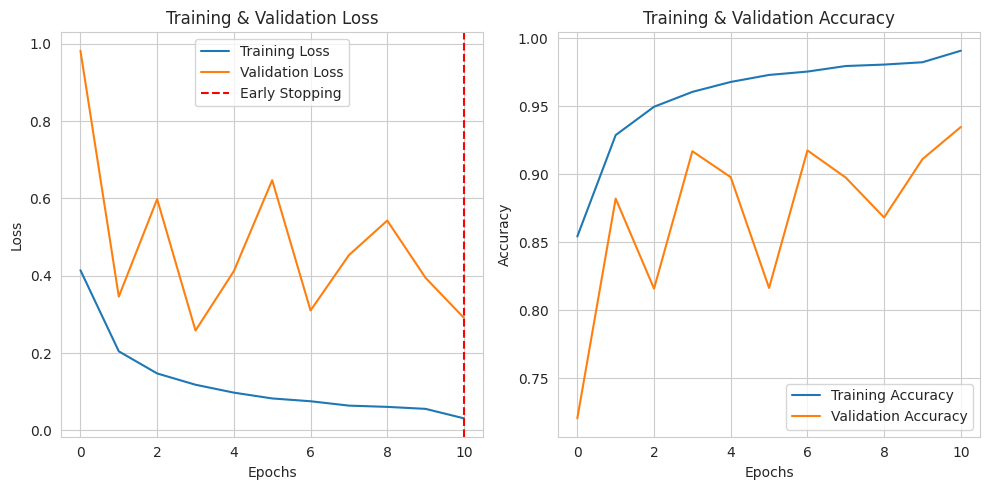

In [ ]:
# Plot training & validation loss values
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Highlight the epoch where early stopping occurred
best_val_loss_epoch = es.stopped_epoch
plt.subplot(1, 2, 1)
plt.axvline(x=best_val_loss_epoch, color='red', linestyle='--', label='Early Stopping')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# Get predictions on test data
cnn_predictions= history.model.predict(X_test)

# Convert one-hot encoded predictions back to labels
predicted_labels = np.argmax(cnn_predictions, axis=1)

#Improved result using CNN
evaluate_classification(y_test, predicted_labels)

313/313 [==============================] - 3s 10ms/step
Accuracy: 0.9346
F1 Score: 0.9344
Precision: 0.9371
Recall: 0.9346
Classification Report:
              precision    recall  f1-score   support

         0.0       0.86      0.95      0.91      2000
         1.0       0.96      0.90      0.93      2000
         2.0       0.91      0.97      0.94      2000
         3.0       0.96      0.86      0.91      2000
         4.0       0.99      1.00      0.99      2000

    accuracy                           0.93     10000
   macro avg       0.94      0.93      0.93     10000
weighted avg       0.94      0.93      0.93     10000

Confusion Matrix:
[[1902   59   16   16    7]
 [ 151 1790   33   17    9]
 [   7    6 1942   33   12]
 [ 133   12  137 1718    0]
 [   6    0    0    0 1994]]


# 9.Conclusion

Convolusion Neural Network works better out of the other models with the f2-score of 0.9201 as compair to the other model but there was a problem of overfitting so we used regularisation to overcome the problem of overfitting. After regularisation.

Future work :We can experiment with more advanced CNN architectures like adding more convolutional layers, utilizing different activation functions, or incorporating attention mechanisms for better feature extraction and classification.

Hyperparameter Tuning: Adjust CNN architecture, number of layers, filters, kernel sizes, etc.

Data Augmentation: Generate more training samples by applying transformations to existing data (like shifting, scaling, adding noise).

Learning Rate Optimization: Experiment with different learning rates during training.

Iteratively refining our model and analyzing its performance will help us fine-tune the CNN architecture for optimal ECG signal classification.